In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

### 导入数据
- 1：以时间为索引
- 2：将时间转换成标准格式
- 3：绘制展示各个指标的走势情况

In [3]:
# df = pd.read_csv('./data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

df = pd.read_csv('./data.csv',index_col='Date',parse_dates=True)
df.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


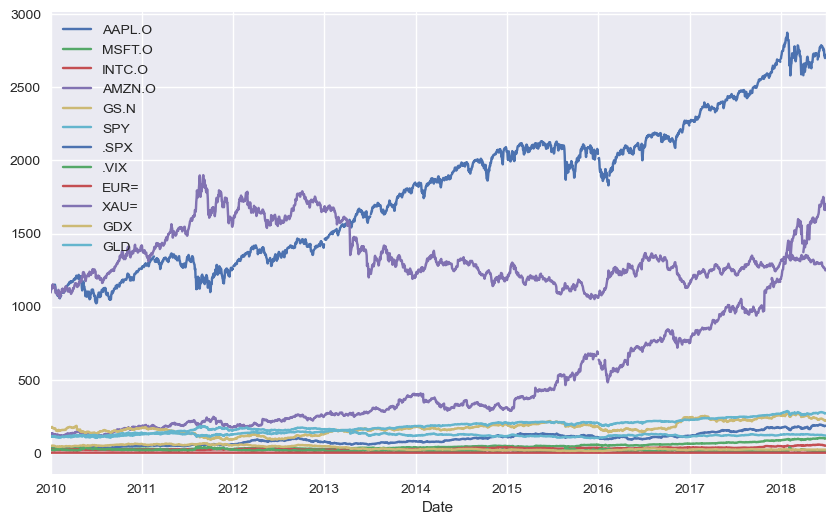

In [4]:
df.plot(figsize=(10,6))
plt.show()

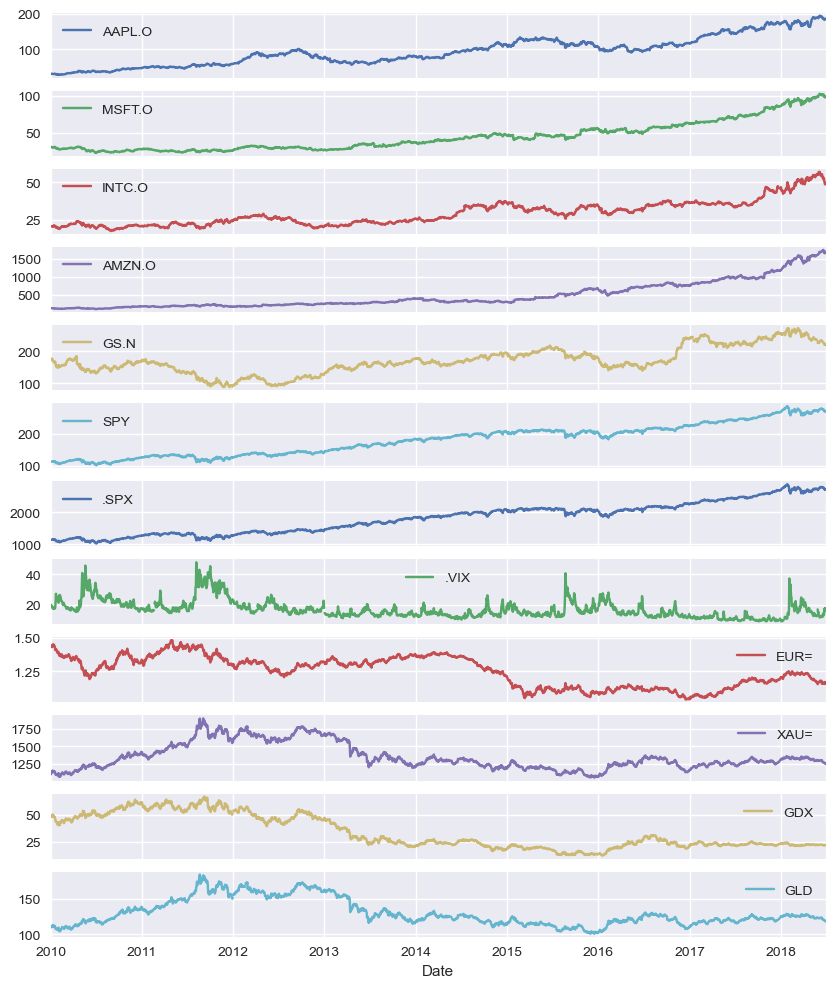

In [21]:
df.plot(kind='line',figsize=(10,12),subplots=True)
plt.show()

### 数据中各个指标含义:
- AAPL.O   | Apple Stock
- MSFT.O   | Microsoft Stock
- INTC.O   | Intel Stock
- AMZN.O   | Amazon Stock
- GS.N     | Goldman Sachs Stock
- SPY      | SPDR S&P 500 ETF Trust
- .SPX     | S&P 500 Index
- .VIX     | VIX Volatility Index
- EUR=     | EUR/USD Exchange Rate
- XAU=     | Gold Price
- GDX      | VanEck Vectors Gold Miners ETF
- GLD      | SPDR Gold Trust


### 统计分析

- 1.数据中各项指标统计结果（小数点保留两位即可）
- 2.使用aggregate方法将多种统计指标汇总

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [10]:
df.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [12]:
df.aggregate([min,max,np.mean,np.std, np.median])

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
median,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500


### 序列变化情况计算

- 1.计算每一天各项指标的差异值（后一天减去前一天结果）
- 2.计算pct_change：增长率也就是 （后一个值-前一个值）／前一个值）
- 3.计算平均计算pct_change指标
- 4.绘图观察哪个指标平均增长率最高
- 5.计算连续时间的增长率（其中需要计算今天价格和昨天价格的差异）
- 6.看看各个指标最初的1块钱相当于现在的多少

#### 差异值

In [14]:
df.diff().head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.010,0.790,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.070,-2.440,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.200,-2.250,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.230,3.520,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55
2010-01-11,-0.267143,-0.390,0.120,-3.212,-2.75,0.16,2.00,-0.58,0.0101,16.50,0.33,1.48
2010-01-12,-0.341428,-0.200,-0.342,-2.958,-3.74,-1.07,-10.76,0.70,-0.0019,-25.30,-1.82,-2.36
2010-01-13,0.418571,0.280,0.352,1.760,1.25,0.96,9.46,-0.40,0.0016,11.10,0.51,1.05


In [15]:
df.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

#### 增长率

In [18]:
df.pct_change().head(10).round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005
2010-01-11,-0.009,-0.013,0.006,-0.024,-0.016,0.001,0.002,-0.032,0.007,0.015,0.007,0.013
2010-01-12,-0.011,-0.007,-0.016,-0.023,-0.022,-0.009,-0.009,0.040,-0.001,-0.022,-0.036,-0.021
2010-01-13,0.014,0.009,0.017,0.014,0.007,0.008,0.008,-0.022,0.001,0.010,0.011,0.010


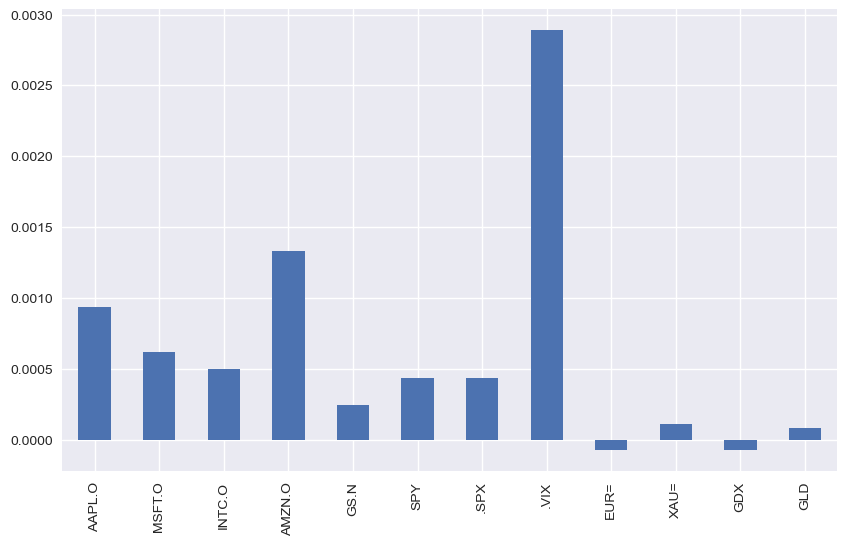

In [22]:
df.pct_change().mean().plot(kind='bar', figsize=(10,6))
plt.show()

#### 计算连续时间的增长率（其中需要计算今天价格和昨天价格的差异）

数据偏移 shift()

In [24]:
df.shift().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-05,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-06,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-07,30.138541,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51


In [30]:
ret = np.log(df/df.shift(1))
ret.head(10).round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005
2010-01-11,-0.009,-0.013,0.006,-0.024,-0.016,0.001,0.002,-0.033,0.007,0.014,0.007,0.013
2010-01-12,-0.011,-0.007,-0.016,-0.023,-0.022,-0.009,-0.009,0.039,-0.001,-0.022,-0.037,-0.021
2010-01-13,0.014,0.009,0.017,0.014,0.007,0.008,0.008,-0.022,0.001,0.010,0.010,0.009


<Axes: xlabel='Date'>

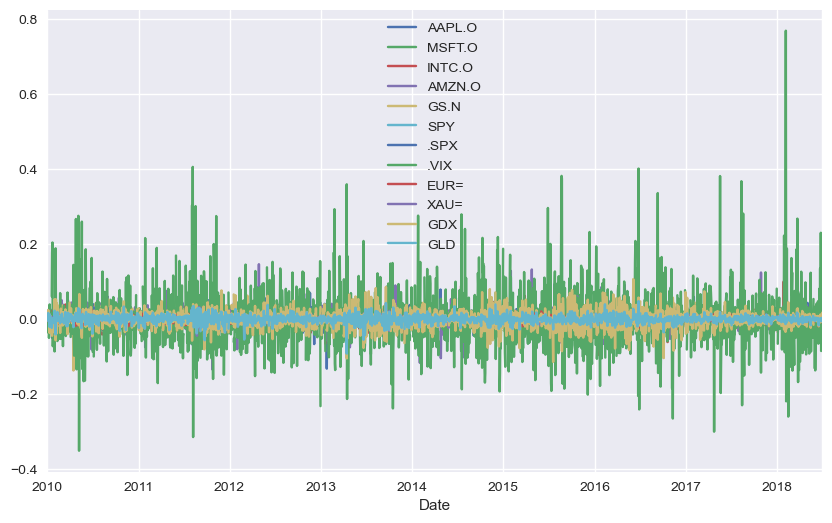

In [32]:
ret.plot(kind='line',figsize=(10,6))

#### 看看各个指标最初的1块钱相当于现在的多少
- 累加cumsum
- log函数
- 还原log值

<Axes: xlabel='Date'>

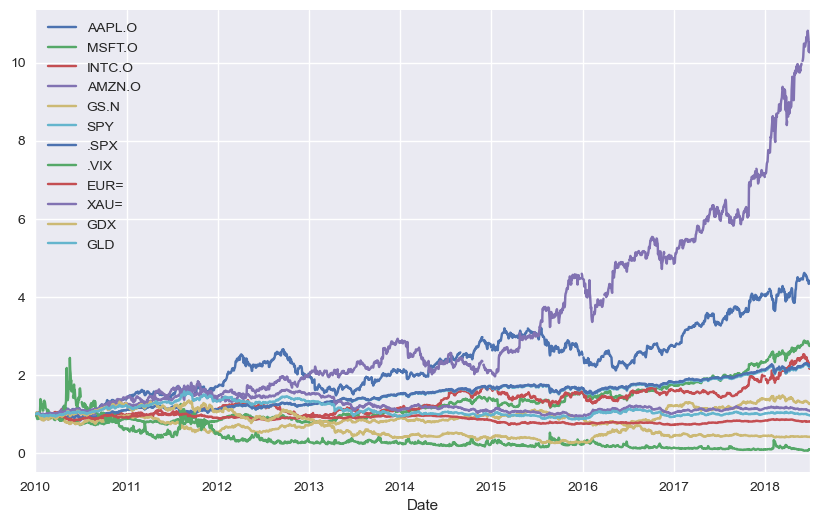

In [33]:
ret.cumsum().apply(np.exp).plot(figsize=(10,6))

### 时间序列重采样
- 1.以星期为单位重构时间序列
- 2.不同指定标签的含义？

- label参数决定label标签的取值向左还是向右
- resample return Resampler object, 使用last()重新格式化为dataframe

In [7]:
df.resample('1w').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [5]:
df.resample('1m', label='left').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2009-12-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-01-31,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-02-28,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-03-31,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-04-30,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


### 时间窗口
- 1.以20为长度制作窗口序列
- 2.统计窗口各个常用指标结果

In [10]:
df2 = df.dropna()

In [11]:
windows = 5

In [21]:
df2['AAPL.O'].rolling(window=windows).min().head(20)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15    29.418542
2010-01-19    29.418542
2010-01-20    29.418542
2010-01-21    29.418542
2010-01-22    28.249972
2010-01-25    28.249972
2010-01-26    28.249972
2010-01-27    28.249972
2010-01-28    28.249972
2010-01-29    27.437544
2010-02-01    27.437544
Name: AAPL.O, dtype: float64

In [14]:
df2['min'] = df2['AAPL.O'].rolling(window=windows).min()
df2['max'] = df2['AAPL.O'].rolling(window=windows).max()
df2['mean'] = df2['AAPL.O'].rolling(window=windows).mean()
df2['std'] = df2['AAPL.O'].rolling(window=windows).std()

In [20]:
df2.head(20)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,min,max,mean,std
Date,,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.800,NaN,NaN,NaN,NaN
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.700,NaN,NaN,NaN,NaN
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.510,NaN,NaN,NaN,NaN
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.820,NaN,NaN,NaN,NaN
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.370,NaN,NaN,NaN,NaN
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.850,NaN,NaN,NaN,NaN
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.490,NaN,NaN,NaN,NaN
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.540,NaN,NaN,NaN,NaN
2010-01-14,29.918542,30.960,21.480,127.350,168.53,114.93,1148.46,17.63,1.4502,1142.85,48.60,112.030,NaN,NaN,NaN,NaN


### 股票序列分析策略
- 1.短期平均计算
- 2.长期平均计算
- 3.黄金交叉与死亡交叉绘图展示

In [32]:
df2['m1'] = df2['AAPL.O'].rolling(window=30).mean()

In [33]:
df2['m2'] = df2['AAPL.O'].rolling(window=250).mean()

In [34]:
df2[['AAPL.O', 'm1', 'm2']].tail(20)

,AAPL.O,m1,m2
Date,,,
2018-06-04,191.83,181.583667,165.90136
2018-06-05,193.31,182.519333,166.05312
2018-06-06,193.98,183.554000,166.20908
2018-06-07,193.46,184.547667,166.38700
2018-06-08,191.70,185.463667,166.57212
2018-06-11,191.23,186.427333,166.75068
2018-06-12,192.28,187.328000,166.93916
2018-06-13,190.70,188.048000,167.12480
2018-06-14,190.80,188.522333,167.31892


<Axes: xlabel='Date'>

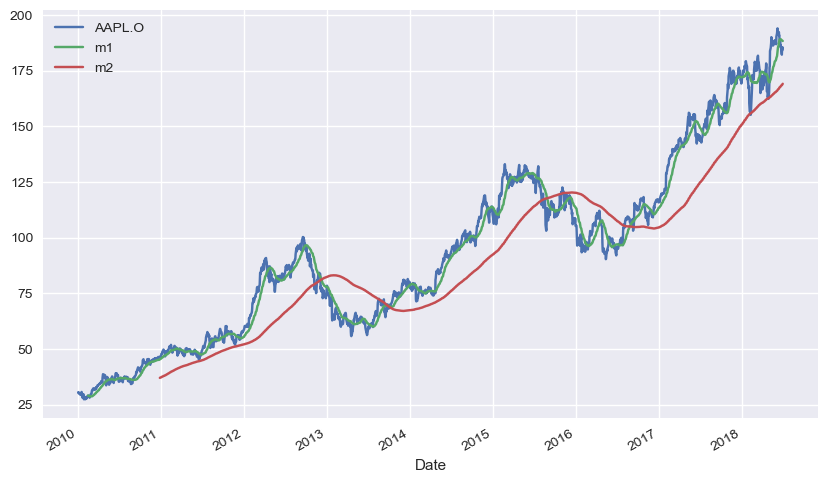

In [41]:
df2[['AAPL.O', 'm1', 'm2']].plot(figsize=(10,6))

In [38]:
df2['gold'] = np.where(df2['m1']>df2['m2'], 1, -1)

<Axes: xlabel='Date'>

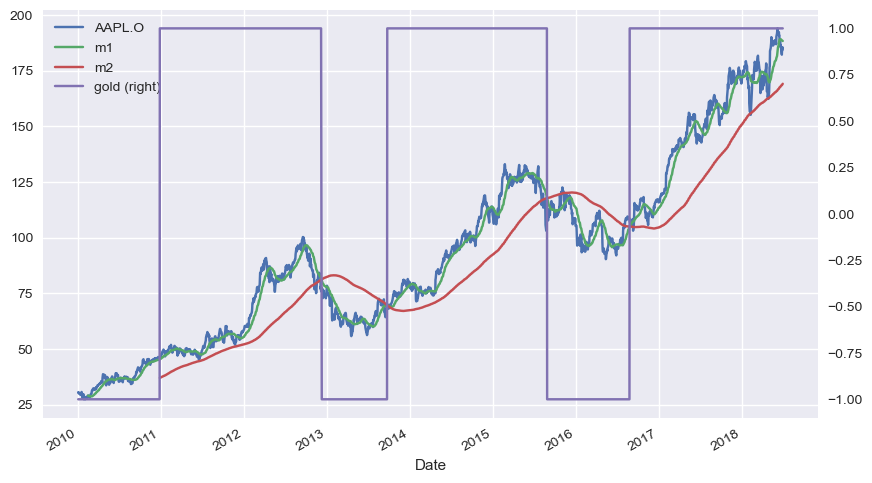

In [42]:
df2[['AAPL.O', 'm1', 'm2', 'gold']].plot(figsize=(10,6),secondary_y='gold')

### 回归分析
- 1.[.spx与.vix]指标之间的关系
- 2.绘图展示他们之间的变化情况
- 3.回归与相关系数计算
- 4.随着年份的变化，计算相关系数的变化情况，并展示

In [43]:
df3 = df2[['.SPX', '.VIX']]
df3.head(10)

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13
2010-01-11,1146.98,17.55
2010-01-12,1136.22,18.25
2010-01-13,1145.68,17.85
2010-01-14,1148.46,17.63


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

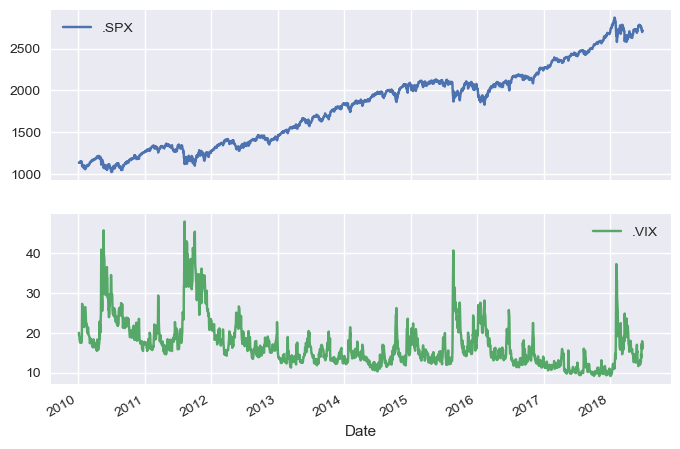

In [45]:
df3.plot(subplots=True)

<Axes: xlabel='Date'>

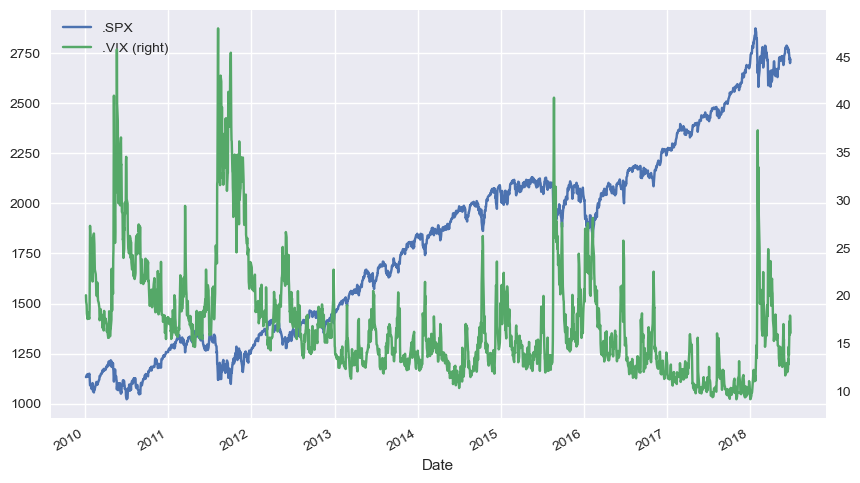

In [46]:
df3.plot(figsize=(10,6),secondary_y='.VIX')

<Axes: xlabel='Date'>

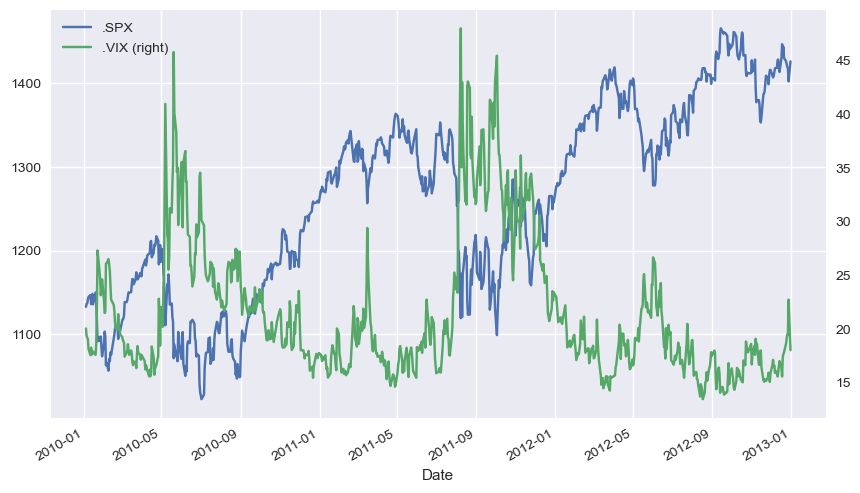

In [47]:
df3.loc[:'2012-12-31'].plot(figsize=(10,6),secondary_y='.VIX')

In [51]:
import numpy as np;
rets = np.log(df3/df3.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

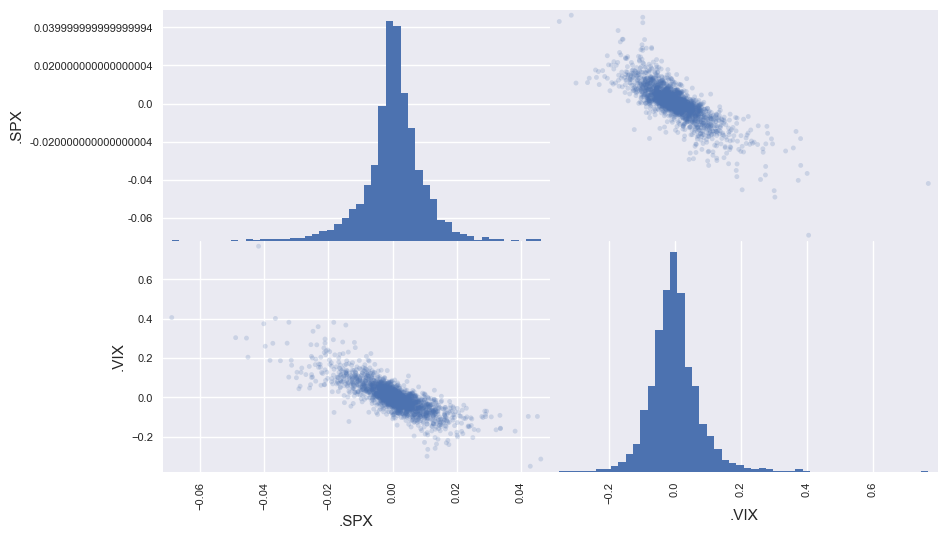

In [52]:
pd.plotting.scatter_matrix(rets,alpha=0.2,diagonal='hist',hist_kwds={'bins': 50}, figsize=(10,6))

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

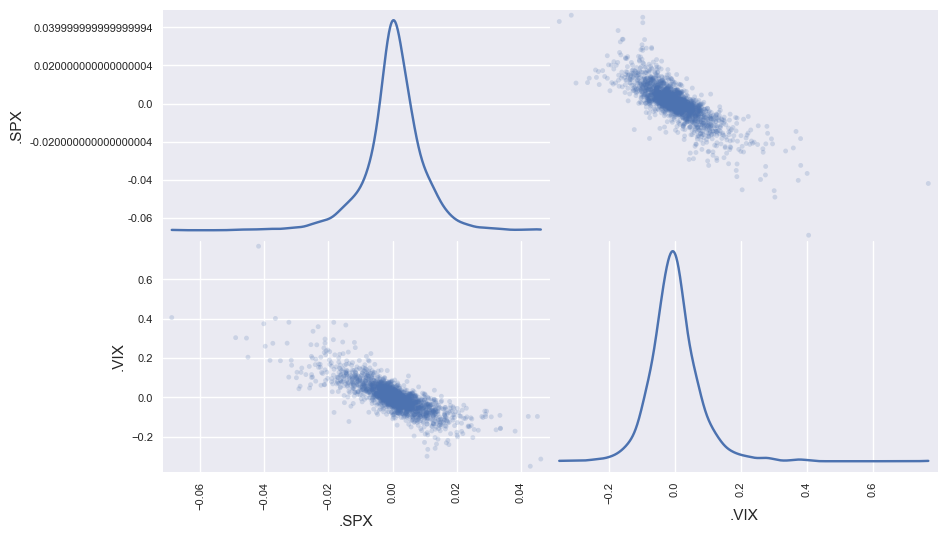

In [53]:
pd.plotting.scatter_matrix(rets,alpha=0.2,diagonal='kde',figsize=(10,6))

### 构建回归方程
Y = a + bX + e

In [64]:
rets = rets.dropna()

In [65]:
reg = np.polyfit(rets['.SPX'],rets['.VIX'], deg=1)

In [66]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514


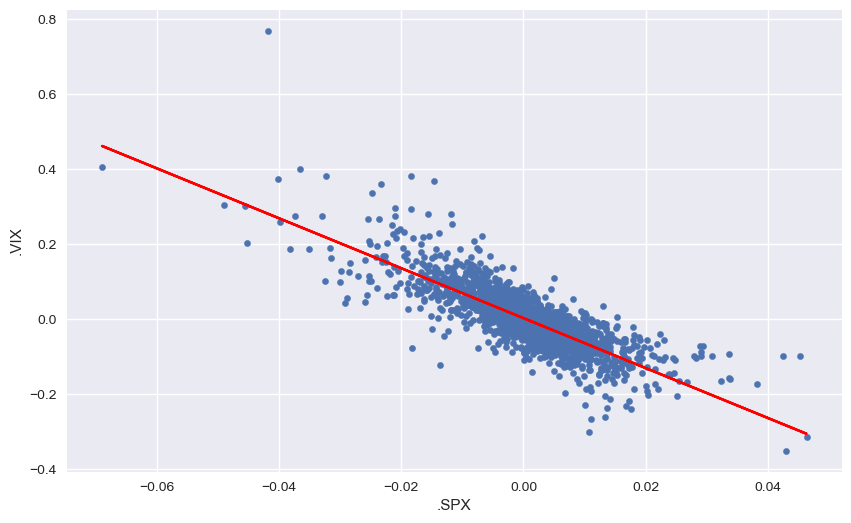

In [70]:
ax = rets.plot(kind='scatter',x='.SPX',y='.VIX',figsize=(10,6))
ax.plot(rets['.SPX'],np.polyval(reg,rets['.SPX']), 'r')

### 相关系数

In [71]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514


In [72]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


<Axes: xlabel='Date'>

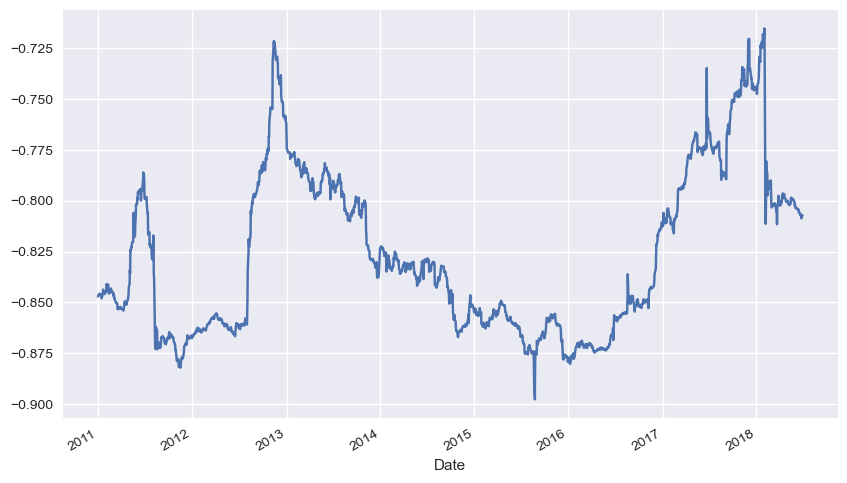

In [73]:
rets['.SPX'].rolling(window=250).corr(rets['.VIX']).plot(figsize=(10,6))

- rets['.SPX']: 这部分从 rets 数据集中选择了列名为 .SPX 的列。这通常代表与标准普尔500指数（S&P 500 Index）相关的数据。

- rolling(window=250): rolling 方法用于创建一个按照指定窗口大小移动的视图，以进行移动窗口的计算。这里的 window=250 指的是窗口大小为 250。在金融数据分析中，窗口大小通常以交易日计算，所以这里的 250 天可能代表一个交易年。

- corr(rets['.VIX']): corr 方法用于计算相关系数。这里它被用来计算 .SPX 的移动窗口和 .VIX 之间的相关性。.VIX 通常代表芝加哥期权交易所波动率指数（CBOE Volatility Index），它是市场波动性的一个重要指标。这个计算将为每个 250 日窗口提供 .SPX 和 .VIX 之间的相关性度量。

- plot(figsize=(10,6)): 这部分代码使用 plot 方法来绘制计算出的相关系数。figsize=(10, 6) 设置了图表的大小，其中宽度为 10 英寸，高度为 6 英寸。

总结来说，这段代码的作用是：计算标准普尔500指数（.SPX）与芝加哥期权交易所波动率指数（.VIX）在 250 交易日移动窗口中的滚动相关性，并将这种相关性随时间的变化绘制成图表。这可以帮助分析在不同时间段内市场指数的波动情况与市场波动性之间的关系。